In [1]:
!pip install matplotlib

In [2]:
!pip install wordcloud

In [3]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [4]:
all_files = glob.glob('8장_data/myCabinetExcelData*.xls')
all_files #출력하여 내용 확인

['8장_data\\myCabinetExcelData (1).xls',
 '8장_data\\myCabinetExcelData (2).xls',
 '8장_data\\myCabinetExcelData (3).xls',
 '8장_data\\myCabinetExcelData (4).xls',
 '8장_data\\myCabinetExcelData (5).xls',
 '8장_data\\myCabinetExcelData (6).xls',
 '8장_data\\myCabinetExcelData (7).xls',
 '8장_data\\myCabinetExcelData (8).xls',
 '8장_data\\myCabinetExcelData (9).xls',
 '8장_data\\myCabinetExcelData.xls']

In [5]:
all_files_data = [] #저장할 리스트
for file in all_files: 
    data_frame = pd.read_excel(file) 
    all_files_data.append(data_frame) 
all_files_data[0] #작업 내용 확인

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,"Authors' Response to Gong's, “Comment on Data ...",unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: Predictive Modeling with Big Da...,unknown,Mary Ann Leibert,2019
2,NaN,3,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
3,NaN,4,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
4,NaN,5,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
...,...,...,...,...,...,...
95,NaN,96,Scalable big data modelling,"Patel, Jayesh",Inderscience,2021
96,NaN,97,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
97,NaN,98,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
98,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014


In [6]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True) 
all_files_data_concat #출력하여 내용 확인


,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,"Authors' Response to Gong's, “Comment on Data ...",unknown,Mary Ann Leibert,2014
1,NaN,2,Correction to: Predictive Modeling with Big Da...,unknown,Mary Ann Leibert,2019
2,NaN,3,Why Big Data = Big Deal,unknown,Mary Ann Leibert,2014
3,NaN,4,A Big Data Guide to Understanding Climate Chan...,unknown,Mary Ann Leibert,2014
4,NaN,5,Data Science and its Relationship to Big Data ...,unknown,Mary Ann Leibert,2013
...,...,...,...,...,...,...
995,NaN,96,Scalable big data modelling,"Patel, Jayesh",Inderscience,2021
996,NaN,97,Improved big data stock index prediction using...,"Eapen, Jithin; Verma, Abhishek; Bein, Doina",Inderscience,2021
997,NaN,98,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014
998,NaN,99,Health big data analytics: current perspective...,"Kuo, Mu-Hsing; Sahama, Tony; Kushniruk, Andre ...",Inderscience,2014


In [7]:
all_files_data_concat.to_csv('8장_data/riss_bigdata.csv', encoding = 'utf-8', index = False)

In [8]:
all_title = all_files_data_concat['제목'] 
all_title #출력하여 내용 확인

0      Authors' Response to Gong's, “Comment on Data ...
1      Correction to: Predictive Modeling with Big Da...
2                                Why Big Data = Big Deal
3      A Big Data Guide to Understanding Climate Chan...
4      Data Science and its Relationship to Big Data ...
                             ...                        
995                          Scalable big data modelling
996    Improved big data stock index prediction using...
997    Health big data analytics: current perspective...
998    Health big data analytics: current perspective...
999    A big data-based RF localisation method for un...
Name: 제목, Length: 1000, dtype: object

In [9]:
#nltk 오류 발생시 실행
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ekdms\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ekdms\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ekdms\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [10]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [11]:
words = [] 
for title in all_title: 
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title)) 
    EnWordsToken = word_tokenize(EnWords.lower()) 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords] 
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop] 
    words.append(EnWordsTokenStopLemma)

In [12]:
print(words) #출력하여 내용 확인

[['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data'], ['big', 'data', 'big', 'deal'], ['big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science'], ['data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making'], ['big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology'], ['reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology'], ['thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center'], ['resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'an

In [13]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2) #출력하여 내용 확인

['author', 'response', 'gong', 'comment', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'correction', 'predictive', 'modeling', 'big', 'data', 'bigger', 'really', 'better', 'junqu', 'de', 'fortuny', 'e', 'marten', 'provost', 'f', 'big', 'data', 'big', 'data', 'big', 'deal', 'big', 'data', 'guide', 'understanding', 'climate', 'change', 'case', 'theory', 'guided', 'data', 'science', 'data', 'science', 'relationship', 'big', 'data', 'data', 'driven', 'decision', 'making', 'big', 'boe', 'fusing', 'spanish', 'official', 'gazette', 'big', 'data', 'technology', 'reference', 'architecture', 'big', 'data', 'solution', 'introducing', 'model', 'perform', 'predictive', 'analytics', 'using', 'big', 'data', 'technology', 'thermal', 'aware', 'dvfs', 'enabled', 'big', 'data', 'task', 'scheduling', 'data', 'center', 'resting', 'state', 'fmri', 'functional', 'connectivity', 'big', 'data', 'preprocessing', 'pipeline', 'topological', 'data', 'analysis', 'semanti

In [14]:
count = Counter(words2)
count #출력하여 내용 확인

Counter({'author': 4,
         'response': 4,
         'gong': 2,
         'comment': 2,
         'data': 1596,
         'science': 49,
         'relationship': 5,
         'big': 1389,
         'driven': 29,
         'decision': 22,
         'making': 18,
         'correction': 6,
         'predictive': 15,
         'modeling': 10,
         'bigger': 7,
         'really': 6,
         'better': 3,
         'junqu': 2,
         'de': 3,
         'fortuny': 2,
         'e': 8,
         'marten': 2,
         'provost': 2,
         'f': 4,
         'deal': 19,
         'guide': 2,
         'understanding': 10,
         'climate': 7,
         'change': 12,
         'case': 10,
         'theory': 7,
         'guided': 2,
         'boe': 2,
         'fusing': 2,
         'spanish': 2,
         'official': 2,
         'gazette': 2,
         'technology': 26,
         'reference': 4,
         'architecture': 13,
         'solution': 14,
         'introducing': 3,
         'model': 46,
         

In [15]:
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1596
big : 1389
analytics : 139
analysis : 71
based : 67
using : 56
approach : 50
science : 49
model : 46
challenge : 46
management : 43
system : 43
earth : 40
research : 40
health : 36
cloud : 34
smart : 33
new : 31
learning : 31
mining : 31
opportunity : 30
driven : 29
issue : 29
processing : 29
review : 28
efficient : 27
technology : 26
use : 26
framework : 25
healthcare : 25
perspective : 24
city : 23
survey : 23
decision : 22
business : 22
small : 22
market : 21
information : 21
knowledge : 21
application : 21
deal : 19
scalable : 19
computing : 19
quality : 19
era : 19
time : 19
making : 18
service : 18
method : 17
care : 17


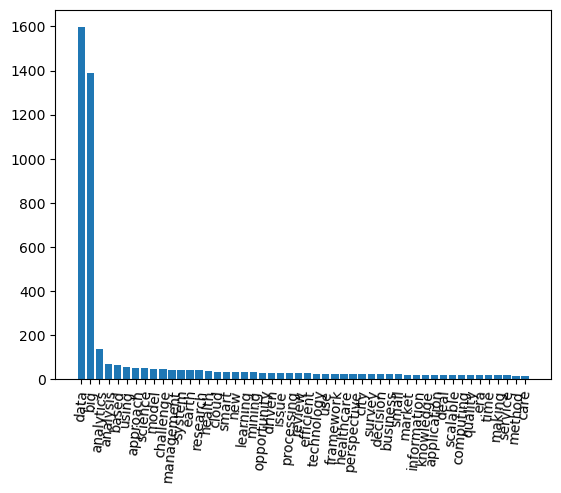

In [16]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

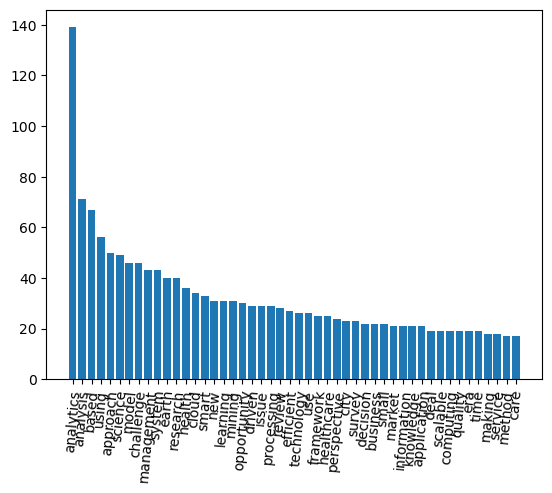

In [17]:
del word_count['big']
del word_count['data']
               
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()

In [18]:
all_files_data_concat['doc_count'] = 0 
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count() 
summary_year #출력하여 내용 확인

,출판일,doc_count
0,1996,1
1,1998,1
2,2002,4
3,2003,1
4,2004,1
5,2005,3
6,2007,2
7,2008,1
8,2009,1
9,2010,2


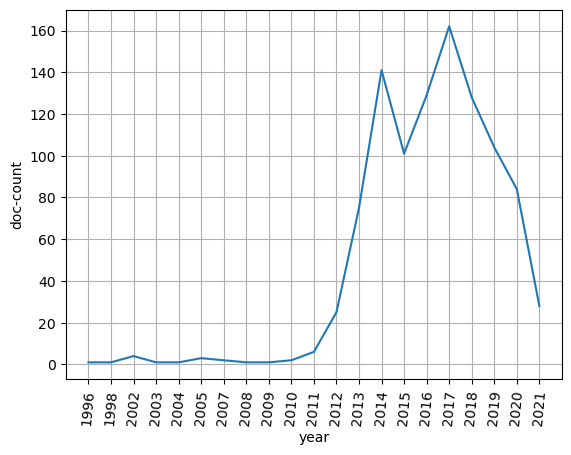

In [24]:
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
#plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']],rotation = '85')
plt.show()


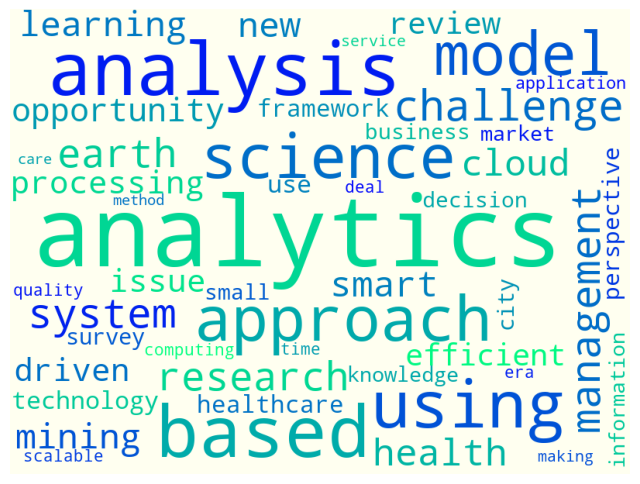

In [39]:
stopwords = set(STOPWORDS)
palettes = ['spring', 'summer', 'seismic','PuBu','winter']
#wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600, colormap = palettes[4])
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [21]:
cloud.to_file("8장_data/riss_bigdata_wordCloud.jpg")